# Homework #4

**Due by midnight on Friday February 15, 2019**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems. Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel is preferred). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 


Name: Adam Ten Hoeve

## A. Theoretical Problems

### Problem A.1

For each of the following models, decide whether one could use linear least squares to estimate the model parameters. Explain your answer.

1.  $\displaystyle Y_i = \beta_0 + \beta_1\log(X_i)$
2. $\displaystyle Y_i = \beta_0 + e^{\beta_1X_i}$
3.  $\displaystyle Y_i = \beta_0 + \beta_1\sin(X_i)$
4.  $\displaystyle Y_i = \beta_0 + \sin(\beta_1X_i)$




1. Yes. Although the feature X is not linear, the model is linear with respect to the parameters $\beta_0$ and $\beta_1$. Because of this, the model can be treated as a system of linear equations and linear least squares can be applied.
2. Yes. The model can be transformed to linear: $ Y_i = \beta_0 + e^{\beta_1X_i} = \beta_0 + e^{\beta_1}e^{X_i} = \beta_0 + ke^{X_i}$. From here, all of the weights are linear coefficients so the model can be estimated using linear least squares.
3. Yes. Similar to the reason for number 1, all of the coefficients are linear so the model can be treated as a system of linear equations and linear least squares can be a good estimate.
4. No. Because the $\beta_1$ term is within the sin() and can not be pulled out, the parameters are not linear and linear least squares would not work.

### Problem A.2

#### Prove that $TSS = RSS + ESS$. Recall that $TSS$ is the total sum of squares, $RSS$ is the residual sum of squares, and $ESS$ is the explained (or model or regression) sum of squares. (HINT: you might start with TSS and add a fancy form of 1 somewhere.)


$$
\begin{align*}
    TSS =& \sum_{i=1}^n (y_i - \bar{y})^2 \\ 
    =& \sum_{i=1}^n (y_i - \hat{y}_i + \hat{y}_i - \bar{y})^2 \\
    =& \sum_{i=1}^n \Big[ (y_i - \bar{y}_i)^2 + (\hat{y}_i - \bar{y})^2 + 2(y_i - \hat{y}_i)(\hat{y}_i - \bar{y}) \Big] \\
    =& \sum_{i=1}^n (y_i - \bar{y}_i)^2 + \sum_{i=1}^n (\hat{y}_i - \bar{y})^2 + 2\sum_{i=1}^n(y_i - \hat{y}_i)(\hat{y}_i - \bar{y}) \\
    =& ESS + RSS + 2\sum_{i=1}^n(y_i - \hat{y}_i)(\hat{y}_i - \bar{y})
\end{align*}
$$
From this point, we must prove $\sum_{i=1}^n(y_i - \hat{y}_i)(\hat{y}_i - \bar{y}) = 0$ for the equality to be true. Recall that $\hat{y} = \beta_0 + \beta_1x_i$ in the SLR case, which we will use for simplicity.

$$ 
\begin{align*}
0 &= \sum_{i=1}^n(y_i - \hat{y}_i)(\hat{y}_i - \bar{y}) \\
&= \sum_{i=1}^n \hat{y}_i(y_i - \hat{y}_i) - \sum_{i=1}^n \bar{y}(y_i - \hat{y}_i) \\
&= \sum_{i=1}^n (\beta_0 + \beta_1x_i)(y_i - \hat{y}_i) - \bar{y} \sum_{i=1}^n (y_i - \hat{y}_i) \\
&= \beta_0\sum_{i=1}^n (y_i - \hat{y}_i) + \beta_1\sum_{i=1}^n x_i(y_i - \hat{y}_i) - \bar{y} \sum_{i=1}^n (y_i - \hat{y}_i) \\
\end{align*}
$$

We want to find $\beta_0$ and $\beta_1$ that minimize the sum. Therefor we can take the partial derivatives with respect to each variable and set it equal to zero. Let's start with $\beta_0$.

$$ 0 = \frac{\partial}{\partial\beta_0}\Big( \beta_0\sum_{i=1}^n (y_i - \hat{y}_i) + \beta_1\sum_{i=1}^n x_i(y_i - \hat{y}_i) - \bar{y} \sum_{i=1}^n (y_i - \hat{y}_i) \Big) = \sum_{i=1}^n y_i - \hat{y}_i$$

This makes sense as the sum of the residuals should be 0. Now let's take the derivative with respect to $\beta_1$.

$$ 0 = \frac{\partial}{\partial\beta_1}\Big( \beta_0\sum_{i=1}^n (y_i - \hat{y}_i) + \beta_1\sum_{i=1}^n x_i(y_i - \hat{y}_i) - \bar{y} \sum_{i=1}^n (y_i - \hat{y}_i) \Big) = \sum_{i=1}^n x_i(y_i - \hat{y}_i)$$

And finally knowing that the sum of the residuals is zero gives us our final answer:

$$ \sum_{i=1}^n(y_i - \hat{y}_i)(\hat{y}_i - \bar{y}) = \beta_0\sum_{i=1}^n (y_i - \hat{y}_i) + \beta_1\sum_{i=1}^n x_i(y_i - \hat{y}_i) - \bar{y} \sum_{i=1}^n (y_i - \hat{y}_i) = 0 $$

Therefor:

$$ TSS = ESS + RSS $$

### Problem A.3

When there is no good reason to believe that $Y$ and $X$ are correlated, instead of fitting a simple linear regression model to your data, we might fit $Y = \beta_0 + \varepsilon$. In fact, when we compute $R^2$ or conduct the full F-test, we are comparing a given MLR model to the model $Y = \beta_0 + \varepsilon$.


#### (a) Generally, what is one advantage and one disadvantage of the mean as a measure of center?


One advantage of the mean is that, with symmetric data, it accureatley and efficiently finds the center of the data. One disadvanged is that the mean can be heavily influenced by skew and outliers. For examle, if we have 9 data points with values around ~10, then 1 outlier data point with value of 1000, then the mean is $\sim 109$, which does not accurately reflect the "center" of the majority of the data.

#### (b)  Generally, what is one advantage and one disadvantage of the median as a measure of center?

Opposite of the mean, the median is still a good measure of center even when the data has outliers as it is not affected by the size of the data, only the order. However, the median can not be used if many statistical calculations or tests.

#### (c)  Show that the ordinary least squares estimate of $\beta_0$ is $\widehat{\beta}_0 = \bar{y}$. 

$$
\begin{align*}
    RSS &= \sum_{i=1}^n (Y_i - \hat{Y-i})^2  \\
    &= \sum_{i=1}^n (Y_i - \beta_0 + \epsilon_i)^2 \\
    &= (Y_1 - \beta_0 + \epsilon)^2 + ... + (Y_n - \beta_0 + \epsilon_i) \\
\end{align*}
$$

Recall that to get our estimate $\hat{\beta_0}$, we want to minimize the RSS. To do so, we will take the derivative with respect to $\beta_0$ and set it equal to zero.

$$
\begin{align*}
    0 &= 2(Y_1 - \beta_0 + \epsilon)(-1) + ... + 2(Y_n - \beta_0 + \epsilon_i)(-1) \\
    0 &= -2 \sum_{i=1}^n Y_i - \beta_0 - \epsilon_i \\
    0 &= \sum_{i=1}^n Y_i - \sum_{i=1}^n \beta_0 - \sum_{i=1}^n \epsilon_i \\
    0 &= \sum_{i=1}^n Y_i - n\beta_0 \\
    \beta_0 &= \frac{1}{n} \sum_{i=1}^n Y_i \\
    \hat{\beta_0} &= \bar{Y}
\end{align*}
$$

In the above equation, note that $\sum_{i=1}^n \epsilon_i = 0$ as the sum of the residuals is zero, assuming that the model is the line of best fit.

#### (d) (**Graduate Students only**) Show that the least absolute value estimate of $\beta_0$, found by minimizing $\sum^n_{i=1}|y_i-\beta_0|$, is the sample median, $\tilde{y}$. (For the linear algebra lovers: the minimization problem in least squares is performed using the 2-norm; this problem is performed using the 1-norm.)

### Problem A.4

Consider the following two models:

\begin{equation}
Y_i = \beta_0 + \beta_1X_{i,1} + ... + \beta_{p}X_{i,p} + \varepsilon_i, \,\,\,\,\,\,\, \text{(M1)}
\end{equation}

and

\begin{equation}
Y_i = \beta_0 + \beta_1X_{i,1} + ... + \beta_{p}X_{i,p} + \beta_{p+1}X_{i,(p+1)} + \varepsilon_i. \,\,\,\,\,\,\, \text{(M2)}
\end{equation}


Show that $R^2$ for M2 is always greater than $R^2$ for M1, no matter what the added predictor is.

To start out, let's look at the equation for the coefficient of determination $R^2$.

$$ R^2 = 1 - \dfrac{RSS}{TSS} = 1 - \dfrac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$$

For M1:
$$ R^2_{M1} = 1 - \dfrac{\sum_{i=1}^n (y_i - (\beta_0 + \beta_1X_{i,1} + ... + \beta_pX_{i,p} + \epsilon_i))^2}{\sum_{i=1}^n (y_i - \bar{y})^2} $$

For M2:
$$ R^2_{M2} = 1 - \dfrac{\sum_{i=1}^n (y_i - (\beta_0 + \beta_1X_{i,1} + ... + \beta_pX_{i,p} + \beta_{p+1}X_{i,(p+1)} + \epsilon_i))^2}{\sum_{i=1}^n (y_i - \bar{y})^2} $$

Now we can find a ratio of these two terms. If $\dfrac{R^2_{M2}}{R^2_{M1}} > 1$, then we know that the $R^2$ value will always be greater than the other. Before we start, we should note that to get the largest total $R^2$ value, we want to minimize the $\frac{RSS}{TSS}$ term.

$$
\begin{align*}
    1 &< \dfrac{R^2_{M2}}{R^2_{M1}} \\
    R^2_{M1} &< R^2_{M2} \\
   1 - \dfrac{\sum_{i=1}^n (y_i - (\beta_0 + \beta_1X_{i,1} + ... + \beta_pX_{i,p} + \epsilon_i))^2}{\sum_{i=1}^n (y_i - \bar{y})^2} &< 1 - \dfrac{\sum_{i=1}^n (y_i - (\beta_0 + \beta_1X_{i,1} + ... + \beta_pX_{i,p} + \beta_{p+1}X_{i,(p+1)} + \epsilon_i))^2}{\sum_{i=1}^n (y_i - \bar{y})^2} \\
   \sum_{i=1}^n (y_i - (\beta_0 + \beta_1X_{i,1} + ... + \beta_pX_{i,p} + \beta_{p+1}X_{i,(p+1)} + \epsilon_i))^2 &< \sum_{i=1}^n (y_i - (\beta_0 + \beta_1X_{i,1} + ... + \beta_pX_{i,p} + \epsilon_i))^2 \\
\end{align*}
$$
I'm not sure how to mathemicatically prove the rest of this but I will go through the intution behind it. We can see that the summations are basically describing distances between two points, one point being the true value $y$ and one being the estimated value $\hat{y}$. The first model does not account for the $p+1$ parameter, which actual means that it's assigning $\beta_{p+1} = 0$. The second model does account for the $p+1$ parameter, meaning that $\beta_{p+1}$ may or may not be 0. If $\beta_{p+1} = 0$ for both models, then they will have the same $R^2$. If $\beta_{p+1} \ne 0$ then (assuming it is the most optimal model) some of the variance of the data is being explained that is not being explained in the first model. Because of this, no matter the value of $\beta_{p+1}$, the unexplained variation of the model $(\frac{RSS}{TSS})$ will be less and the $R^2$ value will increase. 

## B. Computational Problems

### Problem B.1

#### (a) Load the ${\tt prostate}$ data into R using the faraway package. The prostate data frame has 97 rows and 9 columns. It comes from a study on 97 men with prostate cancer who were due to receive a radical prostatectomy.

In [1]:
library(faraway)
head(prostate)

lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
-0.5798185,2.7695,50,-1.386294,0,-1.38629,6,0,-0.43078
-0.9942523,3.3196,58,-1.386294,0,-1.38629,6,0,-0.16252
-0.5108256,2.6912,74,-1.386294,0,-1.38629,7,20,-0.16252
-1.2039728,3.2828,58,-1.386294,0,-1.38629,6,0,-0.16252
0.7514161,3.4324,62,-1.386294,0,-1.38629,6,0,0.37156
-1.0498221,3.2288,50,-1.386294,0,-1.38629,6,0,0.76547


#### (b) Conduct MLR with lpsa as the response and all of the other variables as predictors. Compute the 90% and 95% confidence intervals for the parameter associated with the age variable. Using these intervals, what could we have deduced about the p-value for age in the regression summary. 

In [2]:
lmod1 = lm(prostate$lpsa ~ prostate$lcavol + prostate$lweight + prostate$age + prostate$lbph + prostate$svi + prostate$lcp + prostate$gleason + prostate$pgg45, data = prostate)
confint(lmod1, parm = "prostate$age", level = 0.95)
confint(lmod1, parm = "prostate$age", level = 0.9)

,2.5 %,97.5 %
prostate$age,-0.04184062,0.002566267


,5 %,95 %
prostate$age,-0.0382102,-0.001064151


We know that conifidence intervals and p-values display related information. Because the 95% confidence interval covers 0, we know that the p-value is greater than 0.05. But because the 90% confidence interval does not cover 0, we know the p-value is less than 0.10.

#### (c) In class, we discussed a reason why conducting several individual hypothesis tests (e.g., t-tests for regression parameters) is problematic. It turns out that computing individual confidence intervals has a similar issue. Instead, we might compute a "joint confidence region" for several parameters.  Compute and display the 95% joint confidence region for the parameters associated with age and lbph. Plot the origin on this display. The location of the origin on the display tells us the outcome of certain hypothesis test. State the test and its outcome. 

The ellipse package and corresponding function should help here. Use the code below (and help files) as a guide.

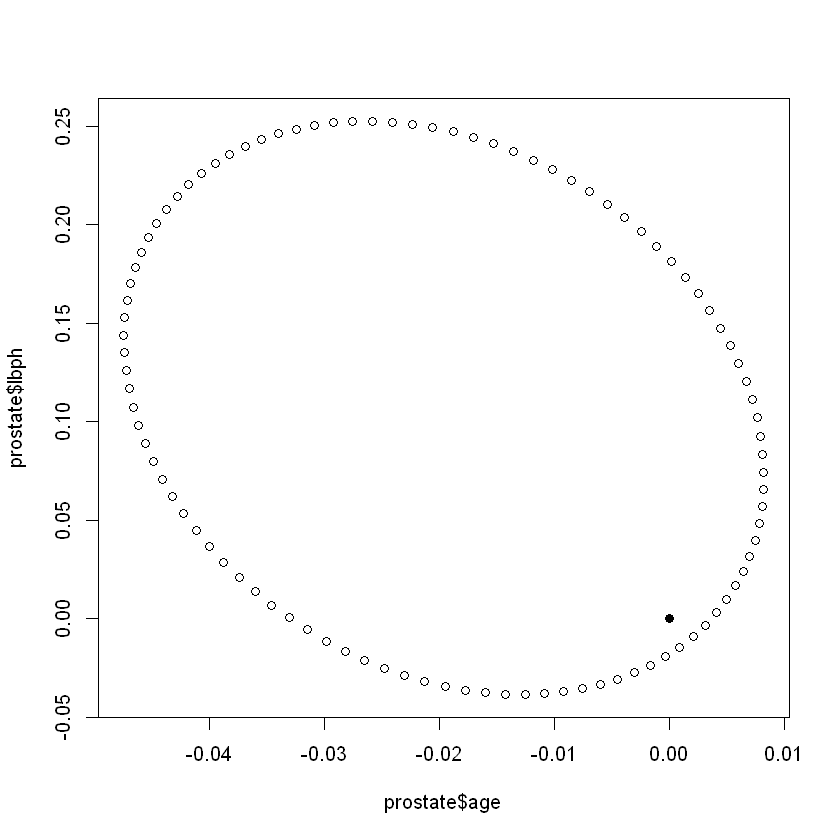

In [3]:
# install.packages("ellipse")
library(ellipse)
#plot(ellipse(NameOfModel,c,type = "l") #c is a vector specifying the indices of the desired parameters
index = c(4,5)
plot(ellipse(lmod1, index, type = "l"))
points(x = 0, y = 0, pch = 19)

For the confidence region, we would be testing the hypotheses:

$H_0: \beta_j = 0$  
$H_1: \beta_j \ne 0$

The confidence region contains all the values of $\mu_0$ that would not be rejected by a t-test. Therefor, because the origin is within the area, we fail to reject the null and assert that the features do not have a statistically significant impact on the result.

#### (d) Remove all predictors that are not significant at the $\alpha = 0.05$ level. Test this model against the original model. Which model is preferred?

In [7]:
lmodRed = lm(prostate$lpsa ~ prostate$lcavol + prostate$lweight + prostate$svi, data = prostate)
anova(lmodRed, lmod1)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
93,47.78486,NA,NA,NA,NA
88,44.16302,5,3.621837,1.443387,0.2167334


After removing the data that was not significant at the $\alpha = 0.05$ level (age, lbph, lcp, gleason, pgg45), we created a new model. When we tested this model with ANOVA, we found that it had a p-value of 0.217, which is greater than 0.05, so we reject the null and assert that the full model has a statistically significant difference that the reduced model so we should not get rid of all of those predictors.

### Problem B.2

This [link](https://www.colorado.edu/amath/sites/default/files/attached-files/advertising.txt) contains advertising data. This dataset contains, in thousands of dollars, TV, Radio, and Newspaper budgets for 200 different markets along with the Sales, in thousands of units, for each market.

#### (a) Load the dataset using the link above and split the data into a training set and a test set, as done in the previous homework. (Remove the variable X.)

In [2]:
data = read.csv("Advertising.csv")
# Name of column to be dropped
dropX = "X"
data = data[, !(names(data) %in% dropX)]
head(data)

TV,radio,newspaper,sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2


In [3]:
# Set the seed for random numbers
set.seed(99)
# Sample size is 80% of the number of rows
sampleSize = floor(0.8 * nrow(data))
# Get random row indexes from the data set
randIndexes = sample(seq_len(nrow(data)), size = sampleSize)
# Create training set from rows with the random indexes. Make test set everything else.
training = data[randIndexes, ]
test = data[-randIndexes, ]

#### (b) Fit the full MLR model. Which variables are statistically significant at the 5% level? Discuss the difference between statistical and practical significance in this context. Also, the estimate for newspaper is negative. Do you actually think that sales *suffer* as a result of newspaper advertising?

In [4]:
lmod = lm(sales ~ TV + radio + newspaper, data = training)
summary(lmod)


Call:
lm(formula = sales ~ TV + radio + newspaper, data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6118 -0.6569  0.1975  1.2522  2.7601 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.9574591  0.3444175   8.587 8.59e-15 ***
TV           0.0466668  0.0015979  29.206  < 2e-16 ***
radio        0.1825387  0.0098530  18.526  < 2e-16 ***
newspaper   -0.0007881  0.0064732  -0.122    0.903    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.74 on 156 degrees of freedom
Multiple R-squared:  0.8989,	Adjusted R-squared:  0.897 
F-statistic: 462.4 on 3 and 156 DF,  p-value: < 2.2e-16


Based on the p-values in the above summary, the TV and radio variables are statistically significant because their p-values are lower than the significance level. Newspaper has a p-value of 0.903 which is much higher than the significance, so so must reject the null and say that it is not statistically significant. Although the data says that newspaper is statistically insignificant, it may still lead to other practical benefits in other ways that are not accounted for in the data, such as visibility and audience. The reason that the newspaper estimate is negative is most likely because it's very close to zero, meaning it has no influence on the result, but some variance in the data slightly shifted it to be negative. Practically, it is unlikely that creating newspapers would decrease sales. 

#### (c) Imagine that, in your test set, you don't have any response measurements. Compute predictions--including 95% *prediction* intervals--of sales for all measurements in your test set. Print the prediction MSE and the first five prediction intervals.

In [5]:
preds = predict(lmod, newdata = test)
predIntervals = predict(lmod, newdata = test, interval = "prediction")
head(predIntervals, 5)
# Calculate the MSE = (1/n)*sum(y-yHat)^2
mean((test[,4] - as.numeric(preds))^2)

,fit,lwr,upr
3,12.084039,8.561592,15.60649
5,13.320209,9.835785,16.80463
8,12.135424,8.679796,15.59105
14,8.889091,5.422603,12.35558
26,15.849677,12.359050,19.34030


[1] 2.178581

The MSE/RSS of the prediction is 2.179.

#### (d) Add some polynomial terms to the model. Specifically, add $TV^2$ and $radio^2$ to the model. To do this, you'll need to use the I() function: I(predictor^2). Comment on the significance of these terms. Assume $\alpha = 0.05$.

In [6]:
lmod2 = lm(sales ~ TV + radio + newspaper + I(TV^2) + I(radio^2), data = training)
summary(lmod2)


Call:
lm(formula = sales ~ TV + radio + newspaper + I(TV^2) + I(radio^2), 
    data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3234 -0.8082  0.0752  1.0235  3.2554 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.823e+00  4.765e-01   3.826 0.000189 ***
TV           7.824e-02  5.678e-03  13.778  < 2e-16 ***
radio        1.324e-01  3.316e-02   3.993 0.000101 ***
newspaper    1.736e-04  5.934e-03   0.029 0.976693    
I(TV^2)     -1.113e-04  1.944e-05  -5.727 5.21e-08 ***
I(radio^2)   1.149e-03  6.784e-04   1.693 0.092447 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.577 on 154 degrees of freedom
Multiple R-squared:  0.918,	Adjusted R-squared:  0.9153 
F-statistic: 344.8 on 5 and 154 DF,  p-value: < 2.2e-16


The added features are surprisingly signficant even though they are basesd on previous data. The $TV^2$ term has a very low p-value, by far low enough to be deemed statistically significant given normal tests. The $radio^2$ term was not deemed statistically significant at 95% confidence, but would be at 90% confidence.

#### (e) Is it surprising that $R^2$ increased from the model in (c) to the model in (d)? Explain why or why not.

It should not be surprising because of two reasons. First, we know that increasing the number of features increases the $R^2$ value (or at worst keeps it the same) so by adding two more predictors, some other variation in the data was somewhat explained. Secondly, the new features are based on data from the original predictors, meaning that they more correlated than say random values. Both of these reasons explain why the value of $R^2$ inceased from **(c)** to **(d)**.

#### (f) Conduct a test (not just individual t-tests) to decide whether you should keep the quadratic terms in your model.

In [8]:
anova(lmod, lmod2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
156,472.3231,NA,NA,NA,NA
154,383.1527,2,89.17041,17.92006,1.007437e-07


Because the p-value of the partial F-test is $1.007*10^{-7}< 0.05$, we reject the null and assert that the initial model is insuffienct and should use the model with the quadratic terms.

#### (g) Redo part (c) for the model with the quadratic terms. How do the predicted MSEs compare?

In [9]:
predQuad = predict(lmod2, newdata = test)
predQuadIntervals = predict(lmod2, newdata = test, interval = "prediction")
head(predQuadIntervals, 5)
# Calculate the MSE = (1/n)*sum(y-yHat)^2
mean((test[,4] - as.numeric(predQuad))^2)

,fit,lwr,upr
3,11.644807,8.428899,14.86071
5,13.902990,10.732890,17.07309
8,12.656876,9.503430,15.81032
14,9.466606,6.318100,12.61511
26,15.177423,11.985447,18.36940


[1] 1.692653

The MSE of the model with the quadratic terms was $1.693$ which is lower than the MSE of $2.179$ for the model without the quadratic terms. This also implies that the second model explains more variance in the data than the first model.